In [1]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Adding (chain) 

In [5]:
df = pd.read_csv("/Users/admin/Desktop/파이썬 실습/파이썬 프로그래밍/visualization project/data/chains_data_v2.csv")


In [6]:
df["chain"] = "(C)" + df["chain"] 

In [7]:
df

,Unnamed: 0,chain,protocol,protocol_category,protocol_chains,protocol_mcaptvl,protocol_tvl,protocol_mcap,protocol_strikeTvl
0,0,(C)Ethereum,Lido,Liquid Staking,"['Ethereum', 'Solana', 'Moonbeam', 'Moonriver'...",0.197030,1.049874e+10,2.068563e+09,True
1,1,(C)Ethereum,MakerDAO,CDP,['Ethereum'],0.081897,7.757027e+09,6.352747e+08,False
2,2,(C)Ethereum,AAVE V2,Lending,"['Ethereum', 'Polygon', 'Avalanche']",0.265740,4.244903e+09,1.128040e+09,False
3,3,(C)Ethereum,AAVE V3,Lending,"['Ethereum', 'Avalanche', 'Polygon', 'Optimism...",NaN,5.643841e+08,NaN,False
4,4,(C)Ethereum,AAVE V1,Lending,['Ethereum'],NaN,2.099140e+07,NaN,False
...,...,...,...,...,...,...,...,...,...
1431,1431,(C)Echelon,ECHSWAP,Dexes,['Echelon'],NaN,0.000000e+00,NaN,False
1432,1432,(C)zkSync,Phezzan Protocol,Dexes,"['Kava', 'zkSync']",NaN,0.000000e+00,NaN,False
1433,1433,(C)zkSync,ZigZag,Dexes,['zkSync'],NaN,0.000000e+00,2.420913e+07,False
1434,1434,(C)Coti,COTI Treasury,Staking,['Coti'],NaN,0.000000e+00,NaN,False


In [8]:
df.to_csv("chains_data_v5.csv")

# Drawing Graph

In [10]:
df = pd.read_csv("chains_data_v5.csv")

In [11]:
df_1 = df[['chain','protocol']]

In [12]:
df_1

,chain,protocol
0,(C)Ethereum,Lido
1,(C)Ethereum,MakerDAO
2,(C)Ethereum,AAVE V2
3,(C)Ethereum,AAVE V3
4,(C)Ethereum,AAVE V1
...,...,...
1431,(C)Echelon,ECHSWAP
1432,(C)zkSync,Phezzan Protocol
1433,(C)zkSync,ZigZag
1434,(C)Coti,COTI Treasury


In [13]:
# Make a list of the chains, we'll use it later
chains = list(df_1.chain.unique())
chains

['(C)Ethereum',
 '(C)Tron',
 '(C)BSC',
 '(C)Arbitrum',
 '(C)Polygon',
 '(C)Optimism',
 '(C)Avalanche',
 '(C)Fantom',
 '(C)Mixin',
 '(C)Cronos',
 '(C)DefiChain',
 '(C)Solana',
 '(C)Kava',
 '(C)Klaytn',
 '(C)Osmosis',
 '(C)Bitcoin',
 '(C)Fusion',
 '(C)Algorand',
 '(C)Celo',
 '(C)Cardano',
 '(C)EOS',
 '(C)Waves',
 '(C)Canto',
 '(C)Ronin',
 '(C)MultiversX',
 '(C)Gnosis',
 '(C)Rootstock',
 '(C)Aurora',
 '(C)Near',
 '(C)Moonbeam',
 '(C)NEO',
 '(C)KCC',
 '(C)Metis',
 '(C)Tezos',
 '(C)Astar',
 '(C)Parallel',
 '(C)Heco',
 '(C)Aptos',
 '(C)Telos',
 '(C)Stacks',
 '(C)Hedera',
 '(C)OKExChain',
 '(C)Conflux',
 '(C)IoTeX',
 '(C)Terra2',
 '(C)Acala',
 '(C)Oasis',
 '(C)Ontology',
 '(C)Moonriver',
 '(C)Stellar',
 '(C)Tlchain',
 '(C)Icon',
 '(C)TON',
 '(C)WEMIX',
 '(C)CORE',
 '(C)Bittorrent',
 '(C)Vision',
 '(C)Wanchain',
 '(C)Karura',
 '(C)DFK',
 '(C)Ultron',
 '(C)Crescent',
 '(C)Injective',
 '(C)Everscale',
 '(C)Umee',
 '(C)Terra Classic',
 '(C)Oraichain',
 '(C)Kujira',
 '(C)Ultra',
 '(C)Flow',
 '(C)P

In [240]:
# Make a list of the protocols, we'll use it later
protocols = list(df.protocol.unique())
protocols

['Lido',
 'MakerDAO',
 'AAVE V2',
 'AAVE V3',
 'AAVE V1',
 'Aave Arc',
 'Curve',
 'Convex Finance',
 'Uniswap V3',
 'Uniswap V2',
 'Uniswap V1',
 'Instadapp',
 'Coinbase Wrapped Staked ETH',
 'Compound',
 'Compound V3',
 'Frax',
 'Frax Ether',
 'Fraxlend',
 'Frax Swap',
 'Frax FPI',
 'Balancer V2',
 'Balancer V1',
 'Rocket Pool',
 'Liquity',
 'Aura',
 'SushiSwap',
 'Sushi BentoBox',
 'Sushi Furo',
 'Sushi Kashi',
 'Yearn Finance',
 'dYdX',
 'Synthetix',
 'Arrakis V1',
 'Arrakis V2',
 'Nexus Mutual',
 'Morpho Aave',
 'Morpho Compound',
 'Olympus DAO',
 'Tornado Cash',
 'Abracadabra',
 'BendDAO Lending',
 'BendDAO APE Staking',
 'DefiSaver',
 'StakeWise',
 'ParaSpace Lending',
 'ParaSpace APE Staking',
 'Blur',
 'UniCrypt',
 'JustLend',
 'JustStables',
 'SUNSwap',
 'SUN.io',
 'SocialSwap',
 'UniFi',
 'NEOPIN Staking',
 'JustMoney',
 'STRX Finance',
 'Garble.Money',
 'OneSwap',
 'RAIDSHIFT Marketplace',
 'FlatCoin DEX',
 'Luminous Finance',
 'PancakeSwap AMM',
 'PancakeSwap StableSwap',
 

In [14]:
dict(zip(chains, chains))

{'(C)Ethereum': '(C)Ethereum',
 '(C)Tron': '(C)Tron',
 '(C)BSC': '(C)BSC',
 '(C)Arbitrum': '(C)Arbitrum',
 '(C)Polygon': '(C)Polygon',
 '(C)Optimism': '(C)Optimism',
 '(C)Avalanche': '(C)Avalanche',
 '(C)Fantom': '(C)Fantom',
 '(C)Mixin': '(C)Mixin',
 '(C)Cronos': '(C)Cronos',
 '(C)DefiChain': '(C)DefiChain',
 '(C)Solana': '(C)Solana',
 '(C)Kava': '(C)Kava',
 '(C)Klaytn': '(C)Klaytn',
 '(C)Osmosis': '(C)Osmosis',
 '(C)Bitcoin': '(C)Bitcoin',
 '(C)Fusion': '(C)Fusion',
 '(C)Algorand': '(C)Algorand',
 '(C)Celo': '(C)Celo',
 '(C)Cardano': '(C)Cardano',
 '(C)EOS': '(C)EOS',
 '(C)Waves': '(C)Waves',
 '(C)Canto': '(C)Canto',
 '(C)Ronin': '(C)Ronin',
 '(C)MultiversX': '(C)MultiversX',
 '(C)Gnosis': '(C)Gnosis',
 '(C)Rootstock': '(C)Rootstock',
 '(C)Aurora': '(C)Aurora',
 '(C)Near': '(C)Near',
 '(C)Moonbeam': '(C)Moonbeam',
 '(C)NEO': '(C)NEO',
 '(C)KCC': '(C)KCC',
 '(C)Metis': '(C)Metis',
 '(C)Tezos': '(C)Tezos',
 '(C)Astar': '(C)Astar',
 '(C)Parallel': '(C)Parallel',
 '(C)Heco': '(C)Heco',
 

In [17]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'chain', 'protocol')

In [20]:
# Check the number of edges
len(list(df.chain.unique()) + list(df.protocol.unique()))

1242

In [21]:
# How many connections does Ethereum have coming out of it?
G.degree('Ethereum')

DegreeView({})

In [243]:
[chain for chain in chains]

['Ethereum',
 'Tron',
 'BSC',
 'Arbitrum',
 'Polygon',
 'Optimism',
 'Avalanche',
 'Fantom',
 'Mixin',
 'Cronos',
 'DefiChain',
 'Solana',
 'Kava',
 'Klaytn',
 'Osmosis',
 'Bitcoin',
 'Fusion',
 'Algorand',
 'Celo',
 'Cardano',
 'EOS',
 'Waves',
 'Canto',
 'Ronin',
 'MultiversX',
 'Gnosis',
 'Rootstock',
 'Aurora',
 'Near',
 'Moonbeam',
 'NEO',
 'KCC',
 'Metis',
 'Tezos',
 'Astar',
 'Parallel',
 'Heco',
 'Aptos',
 'Telos',
 'Stacks',
 'Hedera',
 'OKExChain',
 'Conflux',
 'IoTeX',
 'Terra2',
 'Acala',
 'Oasis',
 'Ontology',
 'Moonriver',
 'Stellar',
 'Tlchain',
 'Icon',
 'TON',
 'WEMIX',
 'CORE',
 'Bittorrent',
 'Vision',
 'Wanchain',
 'Karura',
 'DFK',
 'Ultron',
 'Crescent',
 'Injective',
 'Everscale',
 'Umee(chain)',
 'Terra Classic',
 'Oraichain',
 'Kujira',
 'Ultra',
 'Flow',
 'Proton',
 'Vite',
 'Zilliqa',
 'Secret',
 'smartBCH',
 'Harmony',
 'Velas',
 'Nuls',
 'Dogechain',
 'Step',
 'Juno',
 'Heiko',
 'Bifrost',
 'Interlay',
 'Kardia',
 'Carbon',
 'XDC',
 'Boba',
 'Sora',
 'Ergo'

In [245]:
[G.degree(chain) for chain in chains]

[48,
 14,
 38,
 38,
 46,
 33,
 41,
 35,
 9,
 34,
 2,
 31,
 31,
 32,
 3,
 5,
 1,
 22,
 31,
 17,
 21,
 7,
 10,
 1,
 6,
 34,
 7,
 30,
 16,
 31,
 5,
 23,
 29,
 13,
 29,
 5,
 30,
 19,
 14,
 5,
 6,
 29,
 5,
 16,
 7,
 5,
 15,
 2,
 33,
 2,
 1,
 5,
 4,
 1,
 7,
 9,
 2,
 6,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 27,
 1,
 6,
 1,
 3,
 3,
 4,
 2,
 4,
 22,
 31,
 11,
 3,
 30,
 2,
 4,
 5,
 3,
 2,
 5,
 2,
 3,
 20,
 2,
 3,
 6,
 4,
 1,
 13,
 1,
 3,
 6,
 5,
 1,
 3,
 2,
 2,
 3,
 3,
 1,
 4,
 7,
 2,
 3,
 1,
 1,
 1,
 12,
 6,
 2,
 9,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 5,
 2,
 2,
 2,
 1,
 16,
 1,
 2,
 5,
 1,
 5,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 5,
 2,
 1,
 1]

In [249]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# 1. Create the graph
G = nx.Graph()
G = nx.from_pandas_edgelist(df_1, 'chain', 'protocol')

In [ ]:
# 2. Create a layout for our nodes 
layout = nx.spring_layout(G, iterations=50)

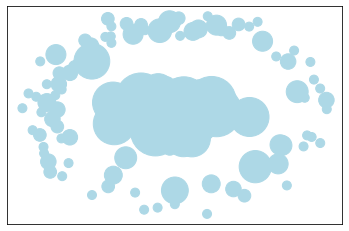

In [250]:
# 3. Draw the parts we want
# Edges thin and grey
# Protocols small and grey
# Chains sized according to their number of connections
# Chains blue
# Labels for chains ONLY
# Protocols which are highly connected are a highlighted color

# Go through every chain name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
chain_size = [G.degree(chain) * 80 for chain in chains]
nx.draw_networkx_nodes(G, 
                       layout, 
                       nodelist=chains, 
                       node_size=chain_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

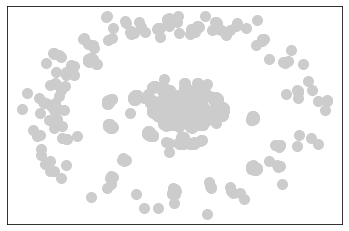

In [251]:
# Draw EVERYONE
nx.draw_networkx_nodes(G, layout, nodelist=protocols, node_color='#cccccc', node_size=100)

{'Ethereum': Text(0.09757285565137863, -0.03977590054273605, 'Ethereum'),
 'Tron': Text(-0.11927473545074463, 0.17076502740383148, 'Tron'),
 'BSC': Text(0.15158711373806, -0.02502584084868431, 'BSC'),
 'Arbitrum': Text(-0.006759666372090578, 0.01771656610071659, 'Arbitrum'),
 'Polygon': Text(0.010889165103435516, -0.023565838113427162, 'Polygon'),
 'Optimism': Text(0.05637994408607483, -0.006617364473640919, 'Optimism'),
 'Avalanche': Text(-0.02072334662079811, -0.06388230621814728, 'Avalanche'),
 'Fantom': Text(0.07480624318122864, -0.08438939601182938, 'Fantom'),
 'Mixin': Text(-0.01243598386645317, -0.7772805690765381, 'Mixin'),
 'Cronos': Text(0.10378299653530121, -0.09994030743837357, 'Cronos'),
 'DefiChain': Text(0.3354525566101074, 0.71547532081604, 'DefiChain'),
 'Solana': Text(-0.13698846101760864, -0.21422415971755981, 'Solana'),
 'Kava': Text(0.016051093116402626, 0.03333368897438049, 'Kava'),
 'Klaytn': Text(-0.22844834625720978, 0.09612292051315308, 'Klaytn'),
 'Osmosis': 

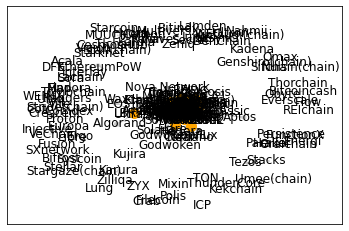

In [257]:
# Draw POPULAR Protocols
popular_protocols = [protocol for protocol in protocols if G.degree(protocol) > 3]
nx.draw_networkx_nodes(G, layout, nodelist=popular_protocols, node_color='orange', node_size=100)

nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(chains, chains))
nx.draw_networkx_labels(G, layout, labels=node_labels)

Text(0.5, 1.0, 'OMG')

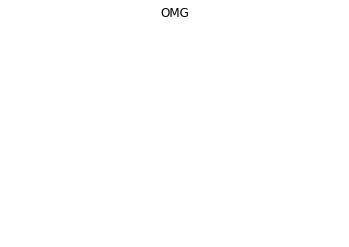

In [258]:
# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("OMG")

In [259]:
# 5. Tell matplotlib to show it
plt.show()

In [ ]:
G_x = nx.random_geometric_graph(200, 0.125)


In [ ]:
G_x.adj

AdjacencyView({0: {15: {}, 41: {}, 43: {}, 64: {}, 111: {}, 119: {}, 143: {}, 166: {}, 176: {}, 186: {}}, 1: {56: {}, 93: {}, 127: {}}, 2: {3: {}, 31: {}, 70: {}, 106: {}, 188: {}, 194: {}}, 3: {2: {}, 7: {}, 31: {}, 70: {}, 91: {}, 106: {}, 145: {}, 188: {}, 194: {}, 195: {}}, 4: {44: {}, 65: {}, 69: {}, 105: {}}, 5: {20: {}, 38: {}, 46: {}, 98: {}, 127: {}, 139: {}, 144: {}, 177: {}}, 6: {18: {}, 40: {}, 54: {}, 67: {}, 76: {}, 87: {}, 89: {}, 112: {}, 124: {}, 146: {}, 174: {}, 196: {}}, 7: {3: {}, 9: {}, 33: {}, 35: {}, 50: {}, 63: {}, 70: {}, 91: {}, 101: {}, 107: {}, 115: {}, 142: {}, 145: {}, 168: {}, 180: {}}, 8: {14: {}, 17: {}, 22: {}, 39: {}, 42: {}, 48: {}, 94: {}, 95: {}, 137: {}, 147: {}, 149: {}, 179: {}}, 9: {7: {}, 34: {}, 50: {}, 59: {}, 66: {}, 101: {}, 107: {}, 126: {}, 145: {}, 156: {}, 168: {}, 175: {}, 189: {}}, 10: {18: {}, 19: {}, 45: {}, 75: {}, 131: {}, 163: {}, 187: {}}, 11: {37: {}, 62: {}, 77: {}, 151: {}, 192: {}}, 12: {52: {}, 68: {}, 74: {}, 100: {}, 10

In [ ]:
G_x.edges()

EdgeView([(0, 15), (0, 41), (0, 43), (0, 64), (0, 111), (0, 119), (0, 143), (0, 166), (0, 176), (0, 186), (1, 56), (1, 93), (1, 127), (2, 3), (2, 31), (2, 70), (2, 106), (2, 188), (2, 194), (3, 7), (3, 31), (3, 70), (3, 91), (3, 106), (3, 145), (3, 188), (3, 194), (3, 195), (4, 44), (4, 65), (4, 69), (4, 105), (5, 20), (5, 38), (5, 46), (5, 98), (5, 127), (5, 139), (5, 144), (5, 177), (6, 18), (6, 40), (6, 54), (6, 67), (6, 76), (6, 87), (6, 89), (6, 112), (6, 124), (6, 146), (6, 174), (6, 196), (7, 9), (7, 33), (7, 35), (7, 50), (7, 63), (7, 70), (7, 91), (7, 101), (7, 107), (7, 115), (7, 142), (7, 145), (7, 168), (7, 180), (8, 14), (8, 17), (8, 22), (8, 39), (8, 42), (8, 48), (8, 94), (8, 95), (8, 137), (8, 147), (8, 149), (8, 179), (9, 34), (9, 50), (9, 59), (9, 66), (9, 101), (9, 107), (9, 126), (9, 145), (9, 156), (9, 168), (9, 175), (9, 189), (10, 18), (10, 19), (10, 45), (10, 75), (10, 131), (10, 163), (10, 187), (11, 37), (11, 62), (11, 77), (11, 151), (11, 192), (12, 52), (12,

In [ ]:
G_x.nodes().

ValuesView(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199)))

In [ ]:
G_x.nodes.data('foo')

NodeDataView({0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None, 50: None, 51: None, 52: None, 53: None, 54: None, 55: None, 56: None, 57: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 65: None, 66: None, 67: None, 68: None, 69: None, 70: None, 71: None, 72: None, 73: None, 74: None, 75: None, 76: None, 77: None, 78: None, 79: None, 80: None, 81: None, 82: None, 83: None, 84: None, 85: None, 86: None, 87: None, 88: None, 89: None, 90: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 97: None, 98: None, 99: No

In [ ]:
edge_x = []
edge_y = []
for edge in G_x.edges():
    x0, y0 = G_x.nodes[edge[0]]['pos']
    x1, y1 = G_x.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

In [ ]:
edge_x

[0.5574126625708962,
 0.6059600968813127,
 None,
 0.5574126625708962,
 0.558093856769183,
 None,
 0.5574126625708962,
 0.46361769652740237,
 None,
 0.5574126625708962,
 0.4939970051375333,
 None,
 0.5574126625708962,
 0.49408445997589556,
 None,
 0.5574126625708962,
 0.6762087919118798,
 None,
 0.5574126625708962,
 0.5329548525934067,
 None,
 0.5574126625708962,
 0.47268746423746877,
 None,
 0.5574126625708962,
 0.6316321544488678,
 None,
 0.5574126625708962,
 0.6362476945544668,
 None,
 0.02177459752048405,
 0.0873077014433874,
 None,
 0.02177459752048405,
 0.04862883009117991,
 None,
 0.02177459752048405,
 0.07955743121355274,
 None,
 0.4611337125655528,
 0.4732330332625537,
 None,
 0.4611337125655528,
 0.38826530656345903,
 None,
 0.4611337125655528,
 0.4672924463603273,
 None,
 0.4611337125655528,
 0.4938710282879434,
 None,
 0.4611337125655528,
 0.5246828767881486,
 None,
 0.4611337125655528,
 0.4845355210943417,
 None,
 0.4732330332625537,
 0.5196780638684286,
 None,
 0.473233033

In [ ]:
edge_trace = go.Scatter(
    x=[0,1,None,2,3], y=[2,7,None,2,3],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [ ]:
fig = go.Figure(data=edge_trace)

In [ ]:
fig.show()